#ML project for Covid-19 Statistics


#Created 


*   Priyanshu Rawat
*   Gmail- priyanshurawat03@gmail.com
*   GitHub- https://github.com/priyanshurawat03
*   **Source of Information** 

          1.   https://www.kaggle.com
          2.   https://www.who.int/emergencies/diseases/novel-coronavirus-2019/situation-reports







#Importing Libraries 


In [0]:
import pandas as pd                   
import matplotlib.pyplot as plt      
%matplotlib inline  
import numpy as np                  
import seaborn as sns                
import plotly.express as px          
import plotly.graph_objects as go    
import folium                        
from folium import plugins           

#manipulating default plot size
plt.rcParams['figure.figsize']=10,12

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Reading Dataset


In [0]:
#Reading data  Data is till 10/05/20
df=pd.read_csv('/content/state_details.csv')
df_ind=df.copy()
dbd_India=pd.read_excel('/content/per_day_cases.xlsx')

#Displaying Data

In [0]:
#displaying content

df_ind=df.loc[:,'Name of State / UT':'Death']
df_ind.style.background_gradient(cmap='Greens')

,Name of State / UT,Total Confirmed cases (Including 111 foreign Nationals),Cured/Discharged/Migrated,Death
0,Andaman and Nicobar Islands,33,33,0
1,Andhra Pradesh,1930,887,44
2,Arunachal Pradesh,1,1,0
3,Assam,63,34,2
4,Bihar,591,322,5
5,Chandigarh,169,24,2
6,Chhattisgarh,59,43,0
7,Dadar Nagar Haveli,1,0,0
8,Delhi,6542,2020,73
9,Goa,7,7,0


In [0]:
#Printing active cases
df['Total Active']=df['Total Confirmed cases (Including 111 foreign Nationals) ']-(df['Cured/Discharged/Migrated']+df['Death'])
print('Total Active Cases ',df['Total Active'].sum())

#displaying total active cases state wise
Tot_cases=df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_cases.style.background_gradient(cmap='Reds')


Total Active Cases  41472


,Total Active
Name of State / UT,
Maharashtra,15649
Gujarat,5233
Tamil Nadu,4667
Delhi,4449
Uttar Pradesh,1800
Madhya Pradesh,1723
Rajasthan,1576
Punjab,1574
West Bengal,1243


#Geographical Representation of Data

In [0]:
df_full=df.copy()
map = folium.Map(location=[20, 70], zoom_start=6,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.008, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='green',fill_opacity=0.1 ).add_to(map)
map

#

#Rising of Corona Virus


In [0]:
#scatterplot graph
import plotly
plotly.io.renderers.default = 'colab'

#Rise of Covid19 in India Per day Analysis
fig=go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['date'], y = dbd_India['total_cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

# New COVID-19 cases reported daily in India
import plotly.express as px
fig = px.bar(dbd_India, x="date", y="new_cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()


#Coronavirus State Data


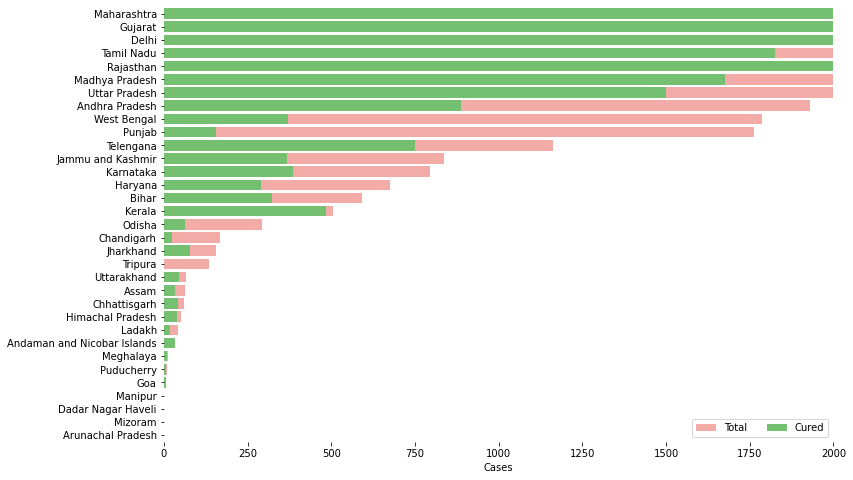

In [0]:
#graph plot (Confirmed vs Recovered Cases)

f, ax = plt.subplots(figsize=(12, 8))
col=df.keys()
#col have stored the name of columns
data = df[[col[0],col[1],col[2],col[3]]]
data.sort_values(col[1],ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x=col[1], y=col[0], data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x=col[2], y=col[0], data=data, label="Cured", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 2000), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

#State Data Bar Graph

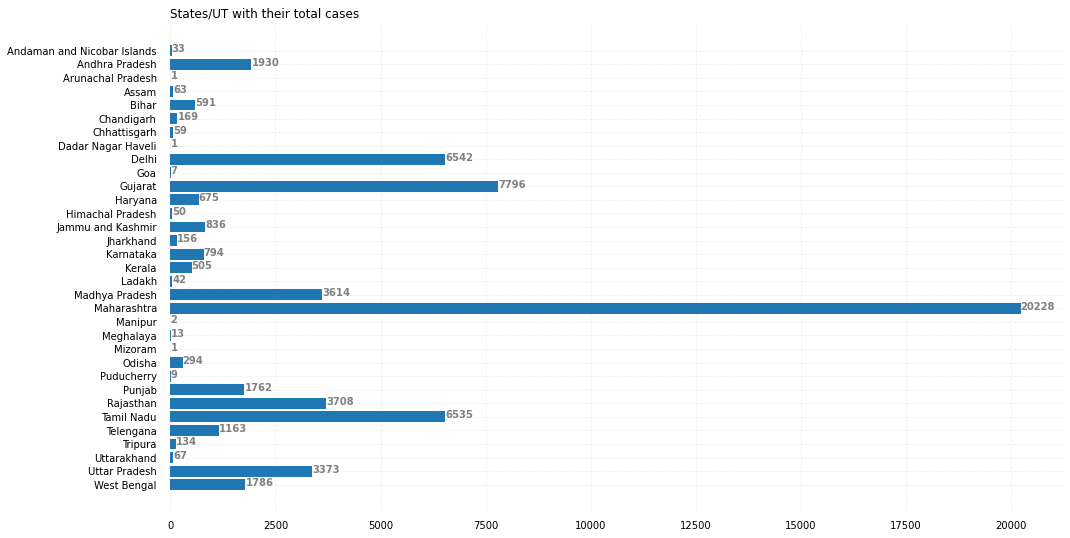

In [0]:
#state Data Graph
col=df.keys()


state=df[col[0]].head(34)
total=df[col[1]].head(34)
fig, ax = plt.subplots(figsize =(16, 9)) 
ax.barh(state,total)

# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False)

# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 

# Show top values  
ax.invert_yaxis() 
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
    
# Add Plot Title 
ax.set_title('States/UT with their total cases', 
             loc ='left', ) 

plt.show()


# Forecasting Total Number of Cases Worldwide

#Prophet

Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [0]:
#Using Prophet From Facebook
from fbprophet import Prophet
df=pd.read_csv('/content/covid_19_data.csv')

In [0]:
confirmed = df.groupby('ObservationDate').sum()['Confirmed'].reset_index()
deaths = df.groupby('ObservationDate').sum()['Deaths'].reset_index()
recovered = df.groupby('ObservationDate').sum()['Recovered'].reset_index()

In [0]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [0]:
confirmed.tail()

,ds,y
120,2020-05-21,5102424.0
121,2020-05-22,5210817.0
122,2020-05-23,5310362.0
123,2020-05-24,5407613.0
124,2020-05-25,5495061.0


#Forcasting Confirmed Covid-19 cases with Prophet

In [0]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=30)
#modify period to change the upper limit
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
150,2020-06-20
151,2020-06-21
152,2020-06-22
153,2020-06-23
154,2020-06-24


In [0]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
150,2020-06-20,7.749313e+06,7.255087e+06,8.212514e+06
151,2020-06-21,7.834906e+06,7.310175e+06,8.324676e+06
152,2020-06-22,7.919246e+06,7.369681e+06,8.438518e+06
153,2020-06-23,8.002898e+06,7.438957e+06,8.544629e+06
154,2020-06-24,8.092390e+06,7.477633e+06,8.668536e+06


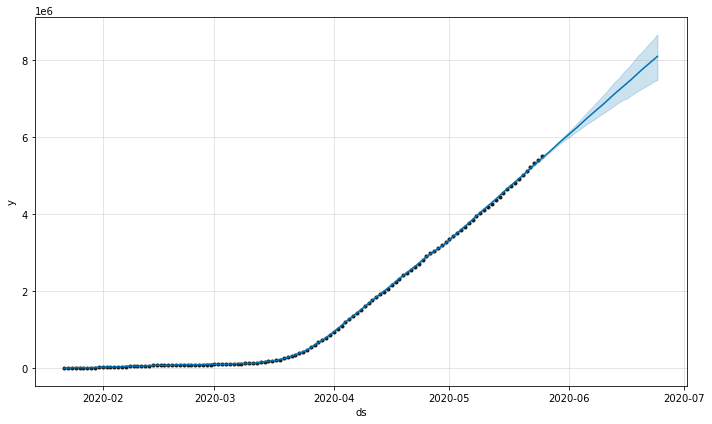

In [0]:
confirmed_forecast_plot = m.plot(forecast)
#Upper Limit is of 15 days from 25-05-2020

#The black dots are forcasted values while the blue line is the predicted value from model.
#The highlighted area is the tolerance range of the model.

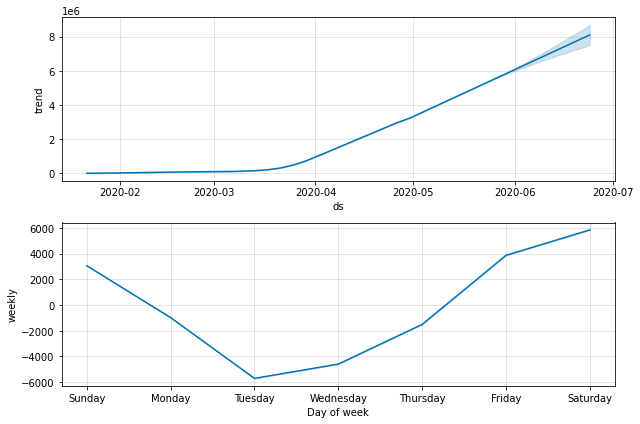

In [0]:
confirmed_forecast_plot =m.plot_components(forecast)
#Upper Limit is of 15 days from 25-05-2020
#The blue line is the predicted value from model.
#The highlighted area is the tolerance range of the model.

#Forcasting Deaths Worldwide using Prophet 

In [0]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [0]:
m2 = Prophet(interval_width=0.95)
m2.fit(deaths)
future2 = m2.make_future_dataframe(periods=15)
#modify period to change the upper limit


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast2 = m2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
135,2020-06-05,404589.891515,393501.078051,416323.852624
136,2020-06-06,409090.658344,396692.687376,422424.360726
137,2020-06-07,413131.460462,400494.822694,428508.261943
138,2020-06-08,417096.746656,402778.880354,434279.175485
139,2020-06-09,422221.053613,406828.103991,440913.251124


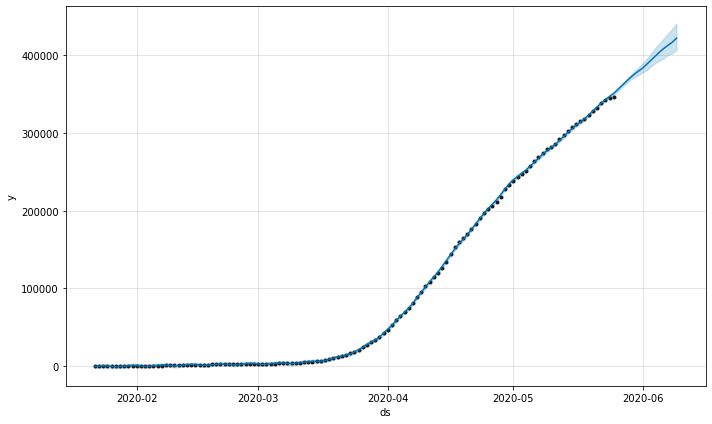

In [0]:
deaths_forecast_plot = m2.plot(forecast2)
#Upper Limit is of 15 days from 25-05-2020
#The black dots are forcasted values while the blue line is the predicted value from model.
#The highlighted area is the tolerance range of the model.

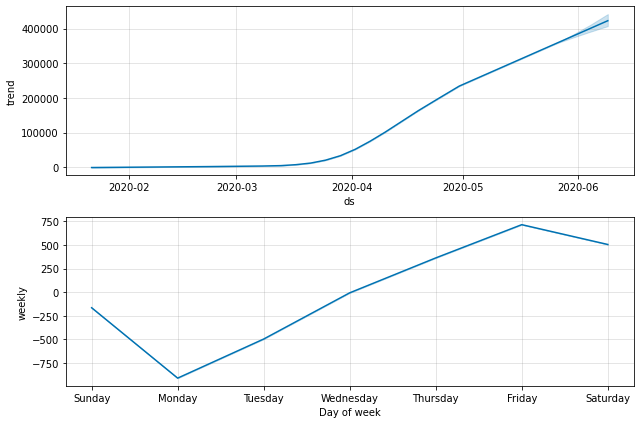

In [0]:
deaths_forecast_plot = m2.plot_components(forecast2)
#Upper Limit is of 15 days from 25-05-2020

# Forecasting Worldwide Recovered Cases with Prophet

In [0]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [0]:
m3 = Prophet(interval_width=0.95)
m3.fit(recovered)
future3 = m3.make_future_dataframe(periods=15)
#modify period to change the upper limit
future3.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
135,2020-06-05
136,2020-06-06
137,2020-06-07
138,2020-06-08
139,2020-06-09


In [0]:
forecast3 = m3.predict(future3)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
135,2020-06-05,2.663723e+06,2.606081e+06,2.720543e+06
136,2020-06-06,2.711076e+06,2.640709e+06,2.778333e+06
137,2020-06-07,2.756912e+06,2.684896e+06,2.831239e+06
138,2020-06-08,2.803636e+06,2.725859e+06,2.880734e+06
139,2020-06-09,2.845006e+06,2.759549e+06,2.927404e+06


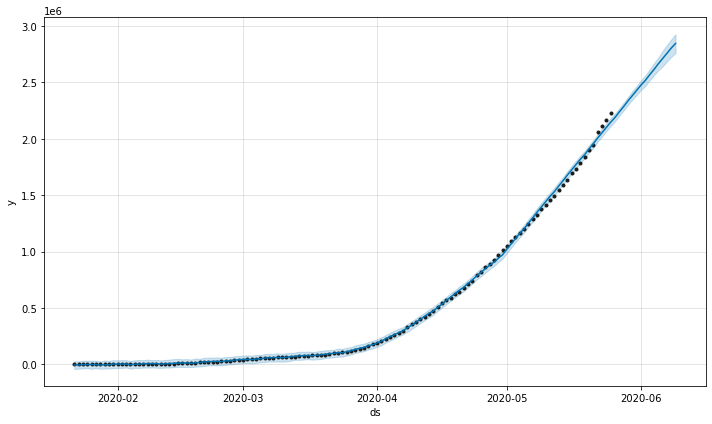

In [0]:
recovered_forecast_plot = m3.plot(forecast3)
#Upper Limit is of 15 days from 25-05-2020
#The black dots are forcasted values while the blue line is the predicted value from model.
#The highlighted area is the tolerance range of the model.

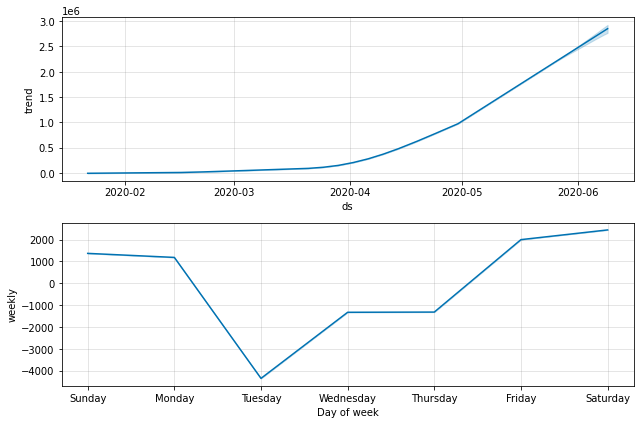

In [0]:
recovered_forecast_plot = m3.plot_components(forecast3)
#Upper Limit is of 15 days from 25-05-2020